In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=25dd4b59226ebc278f5efd2698da021046fb38b7ac0ebf38b6a0bc0f0f02e7da
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


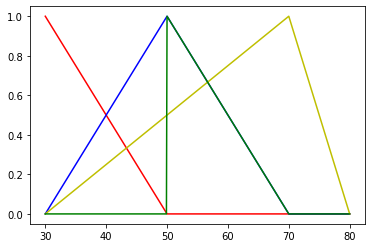

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange(30,80.1,0.1)
slow = fuzz.trimf(x,[30,30,50])
y= np.arange(30,80.1,0.1)
medium = fuzz.trimf(y,[30,50,70])
z= np.arange(30,80.1,0.1)
medium_fast = fuzz.trimf(z,[30,70,80])
a= np.arange(30,80.1,0.1)
full_speed = fuzz.trimf(a,[50,50,70])
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label ='Slow')
plt.plot(y, medium, 'b', linewidth = 1.5, label ='Medium')
plt.plot(z, medium_fast, 'y', linewidth = 1.5, label ='Medium Fast')
plt.plot(a, full_speed, 'g', linewidth = 1.5, label ='Full Speed')

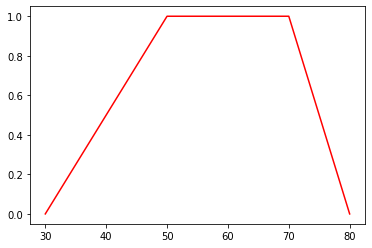

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange(30,80.1,0.1)
show = fuzz.trapmf(x,[30,50,70,80])
plt.figure()
plt.plot(x, show, 'r', linewidth = 1.5, label ='Show')

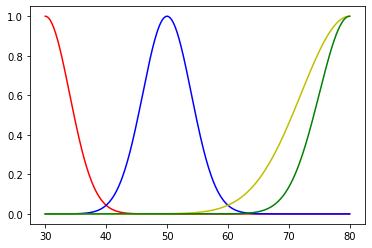

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x= np.arange(30,80.1,0.1)
slow = fuzz.gaussmf(x,30,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,80,8)
full_speed = fuzz.gaussmf(x,80,5)
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label ='Slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label ='Medium')
plt.plot(x, medium_fast, 'y', linewidth = 1.5, label ='Medium Fast')
plt.plot(x, full_speed, 'g', linewidth = 1.5, label ='Full Speed')

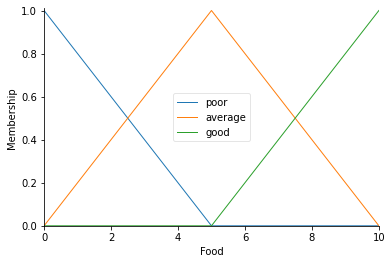

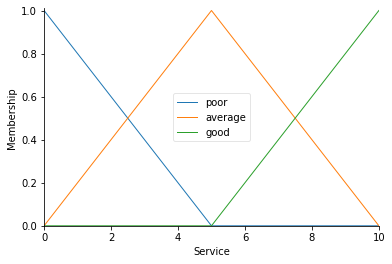

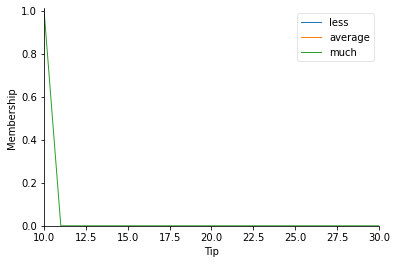

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'Food')
service=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip= ctrl.Consequent(np.arange(10,31,1),'Tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
food.view()
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
service.view()
tip['less']=fuzz.trimf(tip.universe,[0,0,5])
tip['average']=fuzz.trimf(tip.universe,[0,5,10])
tip['much']=fuzz.trimf(tip.universe,[5,10,10])
tip.view()

25.3091066782307


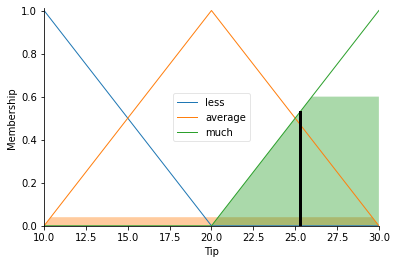

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'Food')
service=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip= ctrl.Consequent(np.arange(10,31,1),'Tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])
rule4=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['average'])
rule6=ctrl.Rule(food['average']&service['good'],tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['average'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=7.0
tipping.input['Service']=9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

17.222222222222218


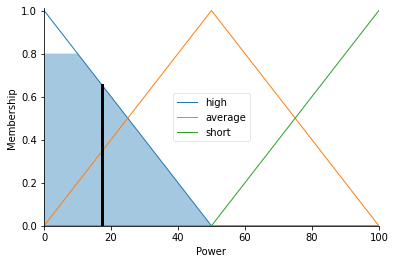

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,181,1),'Time')
rice=ctrl.Antecedent(np.arange(200,2001,1),'Rice')
power=ctrl.Consequent(np.arange(0,101,1),'Power')

time['veryfast']=fuzz.trimf(time.universe,[10,10,20])
time['fast']=fuzz.trimf(time.universe,[10,20,40])
time['average']=fuzz.trimf(time.universe,[20,40,90])
time['short']=fuzz.trimf(time.universe,[40,90,150])
time['veryshort']=fuzz.trimf(time.universe,[90,150,180])

rice['less']=fuzz.trimf(rice.universe,[200,200,1000])
rice['normal']=fuzz.trimf(rice.universe,[200,1000,2000])
rice['much']=fuzz.trimf(rice.universe,[1000,2000,2000])
power['high']=fuzz.trimf(power.universe,[0,0,50])
power['average']=fuzz.trimf(power.universe,[0,50,100])
power['short']=fuzz.trimf(power.universe,[50,100,100])

rule1=ctrl.Rule(time['veryfast']&rice['less'],power['average'])
rule2=ctrl.Rule(time['veryfast']&rice['normal'],power['high'])
rule3=ctrl.Rule(time['veryfast']&rice['much'],power['high'])
rule4=ctrl.Rule(time['fast']&rice['less'],power['average'])
rule5=ctrl.Rule(time['fast']&rice['normal'],power['high'])
rule6=ctrl.Rule(time['fast']&rice['much'],power['high'])
rule7=ctrl.Rule(time['average']&rice['less'],power['short'])
rule8=ctrl.Rule(time['average']&rice['normal'],power['average'])
rule9=ctrl.Rule(time['average']&rice['much'],power['high'])
rule10=ctrl.Rule(time['short']&rice['less'],power['short'])
rule11=ctrl.Rule(time['short']&rice['normal'],power['short'])
rule12=ctrl.Rule(time['short']&rice['much'],power['average'])
rule13=ctrl.Rule(time['veryshort']&rice['less'],power['short'])
rule14=ctrl.Rule(time['veryshort']&rice['normal'],power['short'])
rule15=ctrl.Rule(time['veryshort']&rice['much'],power['short'])

tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Time']=10.0
tipping.input['Rice']=1800.0
tipping.compute()
print(tipping.output['Power'])
power.view(sim=tipping)